In [67]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Preprocessing of Text for Analysis Purposes

## Import filtered dataframe

In [1]:
import pandas as pd

df = pd.read_json('../raw_data/filtered_scraps_from_the_loft.json')

In [2]:
pd.set_option("display.max_rows", None)

In [3]:
df

url  \
0    https://scrapsfromtheloft.com/comedy/jim-gaffi...   
1    https://scrapsfromtheloft.com/comedy/louis-c-k...   
2    https://scrapsfromtheloft.com/comedy/drew-mich...   
3    https://scrapsfromtheloft.com/comedy/mo-amer-m...   
4    https://scrapsfromtheloft.com/comedy/dave-chap...   
5    https://scrapsfromtheloft.com/comedy/kathleen-...   
6    https://scrapsfromtheloft.com/comedy/kathleen-...   
7    https://scrapsfromtheloft.com/comedy/phil-wang...   
8    https://scrapsfromtheloft.com/comedy/dave-chap...   
9    https://scrapsfromtheloft.com/comedy/tom-papa-...   
10   https://scrapsfromtheloft.com/comedy/tom-papa-...   
11   https://scrapsfromtheloft.com/comedy/tom-papa-...   
12   https://scrapsfromtheloft.com/comedy/bo-burnha...   
13   https://scrapsfromtheloft.com/comedy/tig-notar...   
14   https://scrapsfromtheloft.com/comedy/joe-list-...   
15   https://scrapsfromtheloft.com/comedy/nate-barg...   
16   https://scrapsfromtheloft.com/comedy/brian-reg...   
17   https://scrapsfromtheloft.com/comedy/george-ca...   
18   https://scrapsfromtheloft.com/comedy/doug-stan...   
19   https://scrapsfromtheloft.com/comedy/chris-roc...   
20   https://scrapsfromtheloft.com/comedy/sarah-coo...   
21   https://scrapsfromtheloft.com/comedy/bo-burnha...   
22   https://scrapsfromtheloft.com/comedy/vir-das-o...   
23   https://scrapsfromtheloft.com/comedy/larry-the...   
24   https://scrapsfromtheloft.com/comedy/craig-fer...   
25   https://scrapsfromtheloft.com/comedy/kevin-har...   
26   https://scrapsfromtheloft.com/comedy/sam-morri...   
27   https://scrapsfromtheloft.com/comedy/dave-chap...   
28   https://scrapsfromtheloft.com/comedy/chris-roc...   
29   https://scrapsfromtheloft.com/comedy/bill-burr...   
30   https://scrapsfromtheloft.com/comedy/john-mula...   
31   https://scrapsfromtheloft.com/comedy/ronny-chi...   
32   https://scrapsfromtheloft.com/comedy/craig-fer...   
33   https://scrapsfromtheloft.com/comedy/michael-m...   
34   https://scrapsfromtheloft.com/comedy/rob-schne...   
35   https://scrapsfromtheloft.com/comedy/sam-jay-3...   
36   https://scrapsfromtheloft.com/comedy/jack-whit...   
37   https://scrapsfromtheloft.com/comedy/urzila-ca...   
38   https://scrapsfromtheloft.com/comedy/george-lo...   
39   https://scrapsfromtheloft.com/comedy/jim-jeffe...   
40   https://scrapsfromtheloft.com/comedy/bill-hick...   
41   https://scrapsfromtheloft.com/comedy/george-ca...   
42   https://scrapsfromtheloft.com/comedy/eric-andr...   
43   https://scrapsfromtheloft.com/comedy/roy-wood-...   
44   https://scrapsfromtheloft.com/comedy/dave-chap...   
45   https://scrapsfromtheloft.com/comedy/mark-norm...   
46   https://scrapsfromtheloft.com/comedy/doug-stan...   
47   https://scrapsfromtheloft.com/comedy/chris-get...   
48   https://scrapsfromtheloft.com/comedy/ramy-yous...   
49   https://scrapsfromtheloft.com/comedy/kenny-seb...   
50   https://scrapsfromtheloft.com/comedy/billy-con...   
51   https://scrapsfromtheloft.com/comedy/hannah-ga...   
52   https://scrapsfromtheloft.com/comedy/hasan-min...   
53   https://scrapsfromtheloft.com/comedy/patton-os...   
54   https://scrapsfromtheloft.com/comedy/russell-p...   
55   https://scrapsfromtheloft.com/comedy/jimmy-o-y...   
56   https://scrapsfromtheloft.com/comedy/jo-koy-li...   
57   https://scrapsfromtheloft.com/comedy/lee-mack-...   
58   https://scrapsfromtheloft.com/comedy/lee-mack-...   
59   https://scrapsfromtheloft.com/comedy/t-j-mille...   
60   https://scrapsfromtheloft.com/comedy/jerry-sei...   
61   https://scrapsfromtheloft.com/comedy/bill-burr...   
62   https://scrapsfromtheloft.com/comedy/sincerely...   
63   https://scrapsfromtheloft.com/comedy/jim-norto...   
64   https://scrapsfromtheloft.com/comedy/jim-norto...   
65   https://scrapsfromtheloft.com/comedy/maria-bam...   
66   https://scrapsfromtheloft.com/comedy/dave-alle...   
67   https://scrapsfromtheloft.com/comedy/chris-d-e...   
68   https://scrapsfromtheloft.com/comedy/chris-d

## Cleaning Functions

In [4]:
### Imports
import string
import re 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [5]:
### Specific functions to standup/scraps from the loft
def remove_music(text):
    text = re.sub('♪.*?♪', '', text) # remove ♪ stuff that looks like this ♪
    return text

def remove_bracketed(text):
    text = re.sub('\[.*?\]', '', text) # remove [stuff that looks like this]
    text = re.sub('\(.*?\)', '', text) # remove (stuff that looks like this)
    return text

def remove_useless(text):
    text = re.sub('\n\w+\(\s\w+\)?\:\s', '', text) # remove Word: or Word word: with a newline before
    text = re.sub('subtitles? by \w+', '', text) # remove subtile(s) by xxxx
    return text

In [32]:
# general functions for text pre-processing
def remove_punc(text, chars):
    txt = text
    for punc in chars:
        txt = txt.replace(punc, '')
    return txt

def remove_num(text):
    return ''.join(char for char in text if not char.isdigit())

def remove_stopw(text, word_list):
    word_tokens = word_tokenize(text)
    return ' '.join(w for w in word_tokens if not w in word_list)

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split(' ') if len(lemmatizer.lemmatize(word))>2)

In [49]:
def manual_lemmatizer(text):
    text = text.replace('got', 'get').replace(
        'gon', 'go').replace(
        'said', 'say').replace(
        'fucking', 'fuck').replace(
        'went', 'go').replace(
    'finding', 'find')
    return text

In [18]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

## Modifying & applying removal lists 

In [50]:
clean_df = df.copy()

### Remove everything in Brackets, Music notes

In [51]:
clean_df['full_transcript_clean'] = clean_df['full_transcript'].apply(remove_bracketed)

In [ ]:
## TODO: Remove ♪ from specific comedians:
# [Bo Burnham]

In [ ]:
# clean_df['full_transcript_clean'] = clean_df['full_transcript'].apply(remove_music)

### Lowercase, remove useless regex matches, numbers, stopwords and punctuation
Including specific scraps format

In [9]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].str.lower()

In [54]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_useless)

In [55]:
words_to_remove = ['thank', 'cheering', 'recorded', 'applause', 'laughter', 'laughing', 'murmuring', 'chatter',
                       'aired', 'filmed', 'ladies', 'gentlemen', "that's", "i'm", "don't"]
# other possible removals 'netflix special', 'full transcript' 

In [56]:
stopwords_plus = words_to_remove + stopwords.words('english')

In [57]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_num)

In [58]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_stopw, args=(stopwords_plus,))

In [59]:
punc_added = string.punctuation + '“”‘’…♪'

clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_punc, args=(punc_added,))

In [60]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(lemmatize).apply(manual_lemmatizer)

### Remove numbers and stopwords + common comedy words

In [61]:
clean_df.head()

url  \
0  https://scrapsfromtheloft.com/comedy/jim-gaffi...   
1  https://scrapsfromtheloft.com/comedy/louis-c-k...   
2  https://scrapsfromtheloft.com/comedy/drew-mich...   
3  https://scrapsfromtheloft.com/comedy/mo-amer-m...   
4  https://scrapsfromtheloft.com/comedy/dave-chap...   

                                              title  \
0  Jim Gaffigan: Comedy Monster (2021) | Transcript   
1            Louis C. K.: Sorry (2021) | Transcript   
2  Drew Michael: Red Blue Green (2021) | Transcript   
3    Mo Amer: Mohammed in Texas (2021) | Transcript   
4    Dave Chappelle: The Closer (2021) | Transcript   

                                     full_transcript  \
0  Thank you! Thank you! Oh, my gosh. Thank you s...   
1  ♪♪ [“Like a Rolling Stone” by Bob Dylan playin...   
2  (EMOTIONAL MUSIC PLAYING)\n\n(MUSIC ENDS)\n\nD...   
3  [quirky flute music playing]\n\n[single note p...   
4  [audience murmuring]\n\n[murmuring continues]\...   

                               full_transcript_clean  
0  gosh much much nice almost make forget go dead...  
1  upon time dressed fine threw bum dime prime pe...  
2  drew michael nice see people hard time people ...  
3  gentleman feel excitement air houston texas le...  
4  listen carefully favorite band human being fai...

In [71]:
from sklearn.feature_extraction.text import CountVectorizer


In [93]:
t = clean_df['full_transcript_clean'].astype(str)

vectorizer = CountVectorizer(min_df = 0.3, max_df = 0.8, max_features = 20)
X = vectorizer.fit_transform(t)
bow_df = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names())
bow_df

/Users/beebo/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


bit  bitch  black  dad  dick  dog  dude  fuck  girl  joke  men  mom  \
0      2      1      0   15     0    1     2     0     2     6   17    4   
1      1      1      6    0     6   11     4    61     4     2    9    6   
2      1      0      0    5     0    0     9    47     4    10    5    4   
3      6     17      1    1     3    2     0    91     2     1    0    3   
4      0     34     27    0     4    0     8    15     6     9    5    1   
5      0      0      3   12     0    2     0     7     5     1    1   20   
6      3      4      6    3     0    1     1     1     1     2    0   11   
7      9      1      5    1     1    4     0    16     2     0    6    0   
8      0      6     15    0     0    0     0    19     0     2    1    0   
9      0      0      3    0     0   10     2     0    16     0    7    3   
10     1      0      4   11     0    6     0     0     7     1    3    5   
11     2      1      4    4     0    1     2     0    13     0    7   10   
12    10      1      0    3     6    0     4    32     2    12    2   13   
13     2      0      0    2     0    0     0     0     0     3    0    0   
14     8      4      2    3     6    3     1    13     0     3    3    0   
15     7      0      3   19     0    1    14     0     5     1    0    9   
16     0      0      2    0     0    0     0     0     0     1    3    0   
17     0      0     17    0     0    0     0     0     0     0    0    0   
18     2      1      6    0     8    3     9    85     1     4    1    1   
19     1      9     31    1    14    4     3   109    12     1    1    1   
20     5      1     10    1     0    1     0     1     8     1    0    1   
21    14      8      9    1     7    6     3     0    17     6   10    1   
22     6      1      0    5     1    0     2     0     4     3    1    4   
23     2      1      0    0     0    6     4     0     4     2    1    2   
24    10      3      0    4     3    4     0     0     2    26    1    2   
25     2      0     12   15    26    3     1     0     4    15    6    4   
26     3      1      1    2     7    0     5    12     7    11    3    8   
27     0      2     15    0     0    0     1     0     0     0    0    0   
28     0      0      0    0     0    0     0     0     1     0    0    0   
29     0      1      3    0     0    0     1     0     0     0    0    0   
30     1      2      0    1     0    0     0     0     7     1    2    2   
31     4      0     16    0     0    0     0    51     0     0    0    5   
32    13      0      3    2     0    1     0     0     5     1    4    3   
33    21      0      2    5     2   32     0    12     6     0   10    1   
34    12      1      1    2     7    0     1    48     4     0    5    6   
35     7     69     12    5    41    1    11   103    26     0    4    8   
36    18      1      0    7     1    2     0    29     4     7    0    4   
37     8      6      0   12     2    2     2   108     0     0    8    0   
38     1      2      5    3     1   14     5   233     0     1    1   12   
39     6      0      1   13     1    1     0   172     7    19    7    2   
40     0      0      0    1     0    0     0     0     1     1    1    0   
41     7      0      2    3     8   41     0    33     1     8    8    5   
42     2      4      5   11     7    4    16    53     4     2    1   25   
43     2      7     37    0     4    0    27     1     3     2    2    0   
44     0      0      9    0     3    0     5     0     7     0    6    0   
45     0      3     14    1     9    3     5     5    21    13    6    2   
46     0      0      0    0     2    1     5    19     9     0    0    0   
47     5      0      4    4     1    3     6    12     5     8    3   12   
48     0      0      4   17     5    6    17    36     5     0    3   20   
49     1      6      0    3     0    0     7     0     2     6    4   26   
50    19      3      2    0     0    7     0    78     1     0    7    0   
51    35      4      0    0    13   25     0    70   

In [99]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer().fit(clean_df['full_transcript_clean'])

data_vectorized = vectorizer.transform(clean_df['full_transcript_clean'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('like', 113.22866054951622), ('get', 76.97153594385276), ('know', 65.47184448181514), ('say', 42.82916312648956), ('fuck', 42.06060101237956), ('right', 33.93757783065702), ('go', 31.645082975565074), ('one', 29.98572253397389), ('people', 29.833063491531227), ('guy', 23.46609626948077)]
Topic 1:
[('una', 0.33391394741519276), ('del', 0.33390286489233767), ('con', 0.3338404121578564), ('acquisition', 0.33379311297090386), ('marshmallow', 0.33378742680676476), ('casa', 0.33377530251553406), ('tipo', 0.33375458653101336), ('solo', 0.3337388162373108), ('todos', 0.3337311283550988), ('per', 0.33373019508556256)]
Topic 2:
[('che', 1.3230056308693408), ('non', 1.24805838106301), ('sono', 0.8182311540992309), ('una', 0.8060170179606367), ('cazzo', 0.6874246804417381), ('per', 0.6133972826103182), ('perché', 0.6008772486516163), ('gli', 0.5442126591437381), ('questo', 0.5396587800417902), ('più', 0.5386751101003333)]


In [62]:
token_df = clean_df['full_transcript_clean'].apply(tokenize).astype(str)
token_df

0      ['gosh', 'much', 'much', 'nice', 'almost', 'ma...
1      ['upon', 'time', 'dressed', 'fine', 'threw', '...
2      ['drew', 'michael', 'nice', 'see', 'people', '...
3      ['gentleman', 'feel', 'excitement', 'air', 'ho...
4      ['listen', 'carefully', 'favorite', 'band', 'h...
5      ['whoo', 'kathleen', 'madigan', 'kathleen', 'm...
6      ['friend', 'jeff', 'harmon', 'say', 'know', 'c...
7      ['right', 'wow', 'nice', 'wow', 'gosh', 'way',...
8      ['performance', 'special', 'comedian', 'dave',...
9      ['tom', 'papa', 'look', 'look', 'new', 'jersey...
10     ['december', 'cleveland', 'much', 'guy', 'look...
11     ['time', 'right', 'bright', 'city', 'light', '...
12     ['exploring', 'mental', 'health', 'decline', '...
13     ['gosh', 'kidding', 'goodness', 'wow', 'people...
14     ['joe', 'list', 'way', 'much', 'feel', 'like',...
15     ['family', 'singin', 'kitchen', 'family', 'run...
16     ['tuacahn', 'outdoor', 'amphitheater', 'utah',...
17     ['know', 'little', 'late

In [63]:
pd.Series([y for x in token_df.values.flatten() for y in x.split()]).value_counts()

'like',                                             44153
'get',                                              29228
'know',                                             24459
'say',                                              16022
'fuck',                                             13444
'right',                                            12935
'go',                                               11801
'one',                                              10946
'people',                                           10715
'guy',                                               8286
'shit',                                              8069
'think',                                             8015
'want',                                              7590
'thing',                                             7511
'yeah',                                              7507
'time',                                              7337
'man',                                               6746
'going',      

In [ ]:
# frequent_words = ['like']
# clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_stopw, args=(frequent_words,))

In [64]:
full_transcripts = ' '.join(clean_df['full_transcript_clean'])

In [65]:
len(full_transcripts)

8313107

In [68]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 20))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [69]:
word_cloud = WordCloud(width=3000, height = 2000,
                       random_state=1, colormap='Pastel1',
                       collocations=False, stopwords = STOPWORDS).generate(full_transcripts)

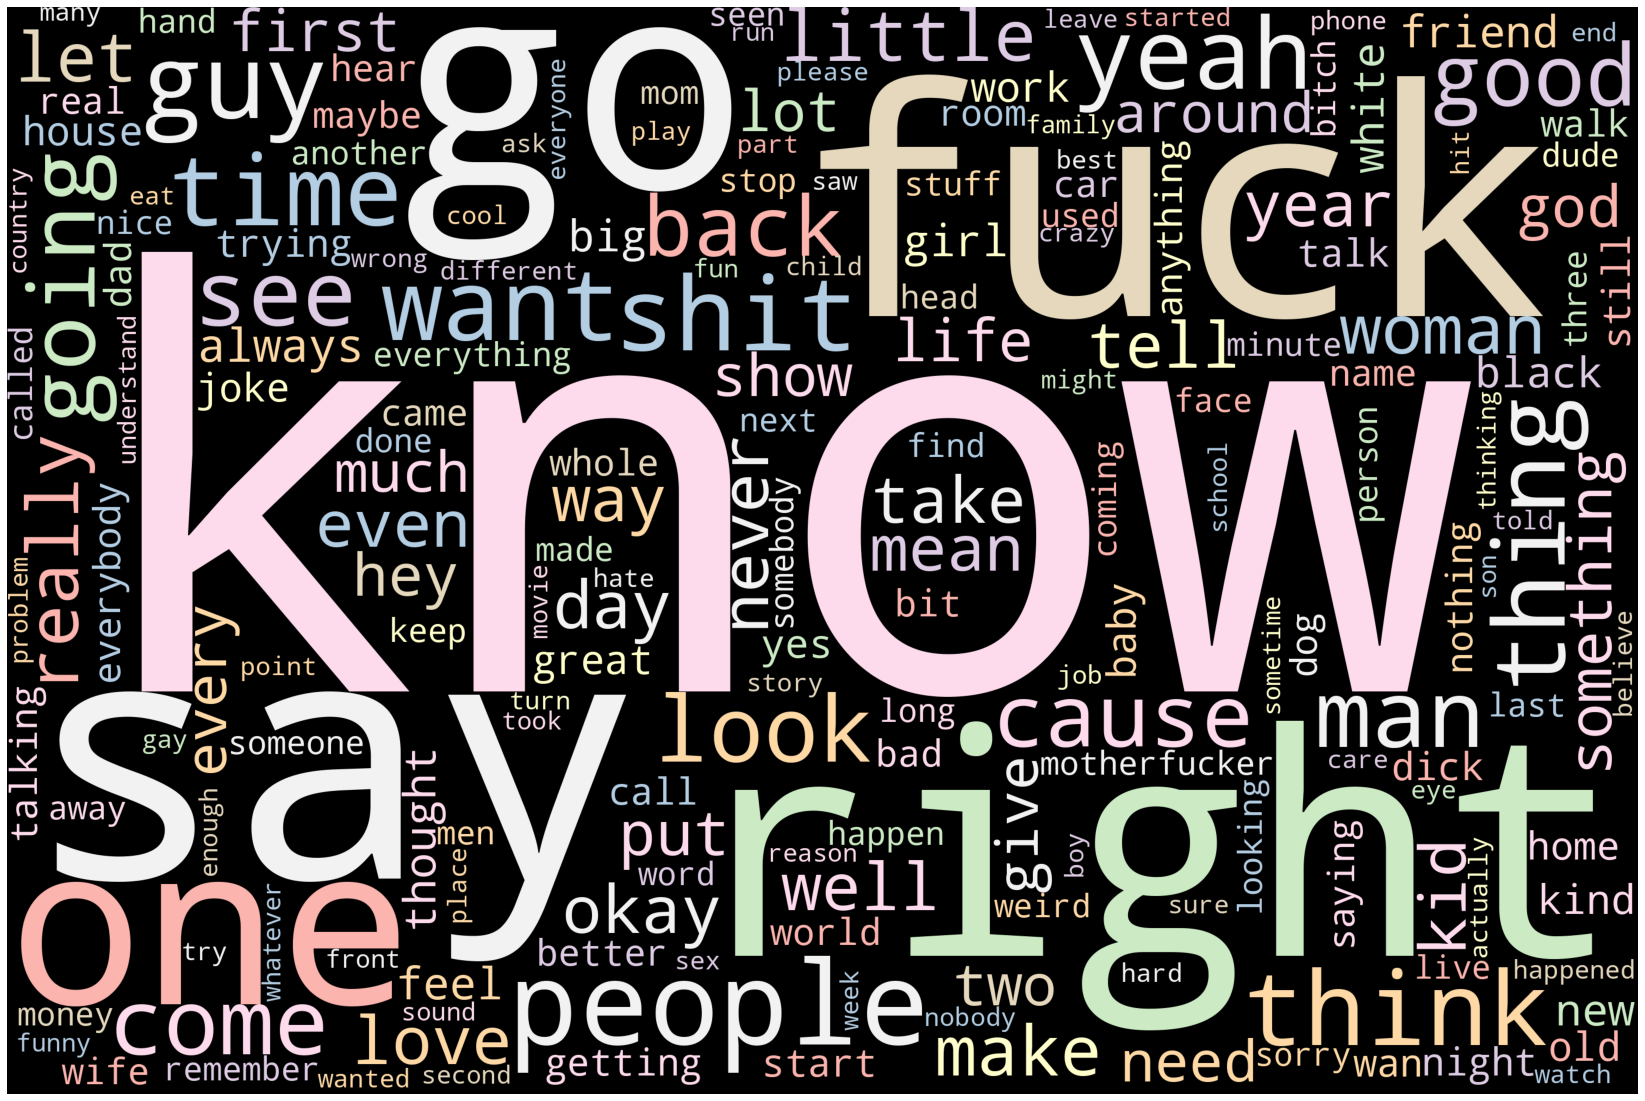

In [70]:
plot_cloud(word_cloud)